(sec-state-tomography)=
# State tomography

State *tomography* is an experimental method to determine the state of a quantum system. In this section, we try to determine the pure state of a qubit by quantum computation.   Measurement of a single qubit cannot determine it due to the stochastic nature of quantum measurement.  We must prepare many  qubits in the same state.

In {numref}`ex-quantum-phase`, we developed a quantum circuit that determines the quantum phase of a qubit.  In that example, we had only one parameter, $\phi$, to be determined. To obtain the full information (up to the global phase) of the state vector, we have to determine two parameters.  Recall that the state of a qubit can be expressed as

$$
|\psi\rangle = \cos\left(\frac{\theta}{2}\right) |0\rangle + \sin\left(\frac{\theta}{2}\right) e^{i \phi}|1\rangle
$$

Measuring this state directly, we obtain only $\left|\cos\left(\frac{\theta}{2}\right)\right|$ and $\left|\sin\left(\frac{\theta}{2}\right)\right|$. Neither $\theta$ nor $\phi$ can be determined from them. We need a quantum algorithm similar to the method used in {numref}`ex-quantum-phase`.  See the following Strategy box on State Tomography.


## Algorithm

To determine the Bloch vector corresponding to a pure state $\psi\rangle$,  change the $x$-, $y$-, $z$-basis to the computational basis and measure the state in the computational basis.

* $x$ component  
Change the basis from the $x$-basis to the computational basis  by the $H$ gate.  
Measure $H |\psi\rangle$.  Then, $r_x = \sin\theta \cos \phi = p_0 -p_1$.

* $y$ component  
Change the basis from the $y$-basis to the computational basis  by the $H\cdot S^\dagger$ gate.    
Measure $(H\cdot S^\dagger) |\psi\rangle$.  Then, $r_y = \sin\theta \sin\phi = p_0 -p_1$.

* $z$ component  
Since the $z$-basis and the computational basis are the same, no need to change the basis.  
Measure $|\psi\rangle$.  Then, $r_z = \cos\theta = p_0 -p_1$.


One the Bloch vector is measured, we can calculate the angles by $\theta = \text{arccos}(r_z)$ and $\phi = \text{arctan2}.(r_y,r_x)$.


This method relies on the probabilities of finding |0> and |1>.  In order to get an accurate result, we need a sufficient number of samplings.  Hence, we must run the circuit many times.

## Circuit

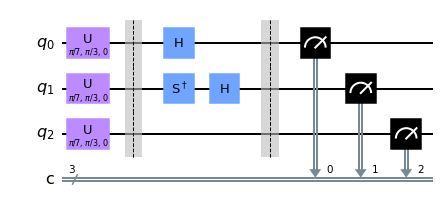

In [6]:
import numpy as np

from qiskit import *

# two classical registers
cr=ClassicalRegister(3,'c')

# two quantum registers (qubits)
qr=QuantumRegister(3,'q')

# set the quantum circuit
qc=QuantumCircuit(qr,cr)

# set parameters
theta=np.pi/7
phi=np.pi/3

# Generation of the state
qc.u(theta,phi,0,[0,1,2])

# separate the preparation part from the phase determination
# by placing a barrier
qc.barrier([0,1,2])

# x-component
qc.h(0)

# y-component
qc.sdg(1)
qc.h(1)

qc.barrier()

# measure the both qubits
qc.measure(qr,cr)

# show the circuit
qc.draw('mpl')

## Execution

In [7]:
# noisy or noiseless simulation
noise=True

# Chose a quantum simulator
if noise:
    # Using Fake IBM Jakarta
    from qiskit.providers.fake_provider import FakeJakarta
    backend = FakeJakarta()
    print("noise is on: Using FakeJakarta")
else:
    # Using noiseless simulator
    backend = Aer.get_backend('qasm_simulator')
    print("noise is off:  Using Qasm_simulatior.")

# set the number of tries
nshots=8192

# execute the quantum circuit and store the outcome
job = backend.run(qc,shots=nshots)

# extract the result
result = job.result()

# count the outcome
counts = result.get_counts()

from qiskit.result import marginal_counts

# marginal counts of each component
counts_x = marginal_counts(result,indices=[0]).get_counts()
counts_y = marginal_counts(result,indices=[1]).get_counts()
counts_z = marginal_counts(result,indices=[2]).get_counts()

# get the Bloch vector components
rx=(counts_x['0']-counts_x['1'])/nshots
ry=(counts_y['0']-counts_y['1'])/nshots
rz=(counts_z['0']-counts_z['1'])/nshots

# evaluate the phase angle
theta_qc=np.arccos(rz)
phi_qc=np.arctan2(ry,rx)


# print out the results
print("measured   phi = {:6.3f} (exact  = {:6.3f} )".format(phi_qc, phi))
print("measured theta = {:6.3f} (exact  = {:6.3f} )".format(theta_qc,theta))


noise is on: Using FakeJakarta
measured   phi =  0.982 (exact  =  1.047 )
measured theta =  0.478 (exact  =  0.449 )



---
Last modified: 08/31/2022